In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import scmulti
from random import shuffle
from scipy import sparse
from matplotlib import pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'

# Load the dataset

In [4]:
rna_kotliarov = sc.read_h5ad('../data/kotliarov-2020/expressions.h5ad')
rna_kotliarov.var_names_make_unique()
rna_kotliarov

AnnData object with n_obs × n_vars = 53196 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
cite_kotliarov = sc.read_h5ad('../data/kotliarov-2020/protein.h5ad')
cite_kotliarov.var_names_make_unique()
cite_kotliarov

AnnData object with n_obs × n_vars = 53196 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
rna10x = sc.read_h5ad('../data/10xpbmc10k-2020/expressions.h5ad')
rna10x.var_names_make_unique()
rna10x

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
atac10x = sc.read_h5ad('../data/10xpbmc10k-2020/peaks.h5ad')
atac10x.var_names_make_unique()
atac10x

AnnData object with n_obs × n_vars = 10000 × 40018
    obs: 'cell_type', 'nb_features'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
rna_kotliarov.obs['cell_type'] = rna_kotliarov.obs['cluster_level1'].astype('category')
cite_kotliarov.obs['cell_type'] = cite_kotliarov.obs['cluster_level1'].astype('category')

In [9]:
rna_gayoso = sc.read_h5ad('../data/gayoso-steier-2020/expressions.h5ad')
rna_gayoso.obs['cell_type'] = rna_gayoso.obs['cell_types']
rna_gayoso

AnnData object with n_obs × n_vars = 30293 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
rna_gayoso.var_names = rna_gayoso.var_names.astype(str)

In [11]:
rna_gayoso.var_names = rna_gayoso.var_names.str.upper()
rna_gayoso.var_names_make_unique()

In [12]:
rna_granja = sc.read_h5ad('../data/granja-2019/expressions-ctrl-paired.h5ad')
rna_granja

AnnData object with n_obs × n_vars = 34902 × 3172
    obs: 'Group', 'nUMI_pre', 'nUMI', 'nGene', 'cell_type', 'Barcode', 'condition', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_id', 'exonLength', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_umap'

## Make all datasets 10k cell long

In [13]:
n_samples = 10000
np.random.seed(42)

granja_sample_indices = np.random.choice(rna_granja.shape[0], size=n_samples, replace=False)
kotliarov_sample_indices = np.random.choice(rna_kotliarov.shape[0], size=n_samples, replace=False)
gayoso_sample_indices = np.random.choice(rna_gayoso.shape[0], size=n_samples, replace=False)

rna_granja = rna_granja[granja_sample_indices]
rna_kotliarov = rna_kotliarov[kotliarov_sample_indices]
cite_kotliarov = cite_kotliarov[kotliarov_sample_indices]
rna_gayoso = rna_gayoso[gayoso_sample_indices]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


## Allign the labels

In [14]:
rna_kotliarov.obs.cell_type.cat.categories

Index([                  b'CD4 naive',                b'CD4 memory T',
       b'Classical monocytes and mDC',                           b'B',
                      b'CD8 memory T',                          b'NK',
                         b'CD8 naive',      b'Unconventional T cells',
           b'Non-classical monocytes',                         b'pDC'],
      dtype='object')

In [15]:
rna_gayoso.obs.cell_type.cat.categories

Index([          b'Activated CD4 T',                      b'B1 B',
                    b'CD122+ CD8 T',                     b'CD4 T',
                           b'CD8 T',              b'Erythrocytes',
                            b'GD T',           b'ICOS-high Tregs',
                    b'Ifit3-high B',          b'Ifit3-high CD4 T',
                b'Ifit3-high CD8 T',             b'Ly6-high mono',
                    b'Ly6-low mono',                      b'MZ B',
       b'MZ/Marco-high macrophages',                  b'Mature B',
                   b'Migratory DCs',                        b'NK',
                             b'NKT',               b'Neutrophils',
                        b'Plasma B',      b'Red-pulp macrophages',
                  b'Transitional B',                     b'Tregs',
                           b'cDC1s',                     b'cDC2s',
                            b'pDCs'],
      dtype='object')

In [16]:
new_cell_types_gayoso = {'Activated CD4 T': 'CD4 memory', 
                         'B1 B': 'B', 
                         'CD122+ CD8 T': 'Unconventional T cells', 
                         'CD4 T': 'CD4 naive', 
                         'CD8 T': 'CD8 naive',
                         'Erythrocytes': 'Erythrocytes', 
                         'GD T': 'Unconventional T cells', 
                         'ICOS-high Tregs': 'Unconventional T cells', 
                         'Ifit3-high B': 'B',
                         'Ifit3-high CD4 T': 'Unconventional T cells', 
                         'Ifit3-high CD8 T': 'Unconventional T cells', 
                         'Ly6-high mono' : 'Classical monocytes and mDC', 
                         'Ly6-low mono': 'Non-classical monocytes',
                         'MZ B': 'B', 
                         'MZ/Marco-high macrophages': 'Macrophages', 
                         'Mature B': 'B', 
                         'Migratory DCs': 'Classical monocytes and mDC', 
                         'NK': 'NK',
                         'NKT': 'Unconventional T cells', 
                         'Neutrophils': 'Neutrophils', 
                         'Plasma B': 'B', 
                         'Red-pulp macrophages': 'Macrophages',
                         'Transitional B': 'B', 
                         'Tregs': 'Unconventional T cells', 
                         'cDC1s': 'Classical monocytes and mDC', 
                         'cDC2s': 'Classical monocytes and mDC', 
                         'pDCs': 'pDC'
    
}

In [17]:
rna_granja.obs.cell_type.cat.categories

Index([        b'01_HSC', b'02_Early.Eryth',  b'03_Late.Eryth',
        b'04_Early.Baso',    b'05_CMP.LMPP',       b'06_CLP.1',
               b'07_GMP',    b'08_GMP.Neut',         b'09_pDC',
               b'10_cDC', b'11_CD14.Mono.1', b'12_CD14.Mono.2',
         b'13_CD16.Mono',         b'14_Unk',       b'15_CLP.2',
             b'16_Pre.B',           b'17_B',      b'18_Plasma',
             b'19_CD8.N',      b'20_CD4.N1',      b'21_CD4.N2',
             b'22_CD4.M',      b'23_CD8.EM',      b'24_CD8.CM',
                b'25_NK',         b'26_Unk'],
      dtype='object')

In [18]:
new_cell_types_granja = {'01_HSC': 'HSC', 
                         '02_Early.Eryth':'Erythrocytes', 
                         '03_Late.Eryth': 'Erythrocytes', 
                         '04_Early.Baso': 'Basophils',
                         '05_CMP.LMPP' : 'CMP', 
                         '06_CLP.1': 'CLP', 
                         '07_GMP' : 'GMP', 
                         '08_GMP.Neut' : 'Neutrophils', 
                         '09_pDC': 'pDC', 
                         '10_cDC': 'Classical monocytes and mDC',
                         '11_CD14.Mono.1': 'Classical monocytes and mDC', 
                         '12_CD14.Mono.2': 'Classical monocytes and mDC', 
                         '13_CD16.Mono': 'Non-classical monocytes', 
                         '14_Unk': 'Unknown',
                         '15_CLP.2' : 'CLP', 
                         '16_Pre.B' : 'B', 
                         '17_B': 'B', 
                         '18_Plasma': 'Plasma', 
                         '19_CD8.N': 'CD8 naive', 
                         '20_CD4.N1': 'CD4 naive',
                         '21_CD4.N2': 'CD4 naive', 
                         '22_CD4.M': 'CD4 memory T', 
                         '23_CD8.EM': 'CD8 memory T', 
                         '24_CD8.CM': 'CD8 memory T', 
                         '25_NK': 'NK', 
                         '26_Unk': 'Unknown'
    
}

In [19]:
rna10x.obs.cell_type.cat.categories

Index([ b'CD56 (bright) NK cells',     b'CD56 (dim) NK cells',
                  b'MAIT T cells',     b'classical monocytes',
          b'effector CD8 T cells',  b'intermediate monocytes',
                b'memory B cells',      b'memory CD4 T cells',
                    b'myeloid DC',           b'naive B cells',
             b'naive CD4 T cells',       b'naive CD8 T cells',
       b'non-classical monocytes',         b'plasmacytoid DC'],
      dtype='object')

In [20]:
# make types more general for now
new_cell_types_10x = {'CD56 (bright) NK cells': 'NK', 'CD56 (dim) NK cells': 'NK', 'MAIT T cells': 'Unconventional T cells',
                  'classical monocytes': 'Classical monocytes and mDC', 'effector CD8 T cells': 'CD8 effector', 'intermediate monocytes': 'Intermediate monocytes',
                  'memory B cells': 'B', 'memory CD4 T cells': 'CD4 memory T', 'myeloid DC': 'Classical monocytes and mDC', 'naive B cells':'B',
                  'naive CD4 T cells': 'CD4 naive', 'naive CD8 T cells': 'CD8 naive', 'non-classical monocytes': 'Non-classical monocytes',
                   'plasmacytoid DC': 'pDC'
                 }

In [21]:
rna10x.obs.cell_type = rna10x.obs.cell_type.astype(str)
rna_granja.obs.cell_type = rna_granja.obs.cell_type.astype(str)
rna_gayoso.obs.cell_type = rna_gayoso.obs.cell_type.astype(str)
rna_kotliarov.obs.cell_type = rna_kotliarov.obs.cell_type.astype(str)

atac10x.obs.cell_type  = atac10x.obs.cell_type.astype(str)
cite_kotliarov.obs.cell_type = cite_kotliarov.obs.cell_type.astype(str)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [22]:
new_10x_cell_types = [new_cell_types_10x[name] for name in rna10x.obs.cell_type]
new_granja_cell_types = [new_cell_types_granja[name] for name in rna_granja.obs.cell_type]
new_gayoso_cell_types = [new_cell_types_gayoso[name] for name in rna_gayoso.obs.cell_type]

In [23]:
# 10x
rna10x.obs.cell_type = new_10x_cell_types
atac10x.obs.cell_type = new_10x_cell_types

# granja
rna_granja.obs.cell_type = new_granja_cell_types

# gayoso
rna_gayoso.obs.cell_type = new_gayoso_cell_types

In [24]:
rna10x.obs

,cell_type,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
b'AAACAGCCAAGGAATC-1',CD4 naive,3308,3307,8.104099,8379.0,9.033604,626.0,6.440947,7.471058
b'AAACAGCCAATCCCTT-1',CD4 memory T,1896,1895,7.547502,3770.0,8.235096,397.0,5.986452,10.530504
b'AAACAGCCAATGCGCT-1',CD4 naive,2904,2903,7.973844,6875.0,8.835793,444.0,6.098074,6.458182
b'AAACAGCCAGTAGGTG-1',CD4 naive,3061,3061,8.026824,7614.0,8.937875,525.0,6.265301,6.895193
b'AAACAGCCAGTTTACG-1',CD4 memory T,1691,1691,7.433667,3633.0,8.198090,152.0,5.030438,4.183870
...,...,...,...,...,...,...,...,...,...
b'TTTGTTGGTGACATGC-1',CD8 naive,1586,1585,7.368970,3284.0,8.097122,358.0,5.883322,10.901340
b'TTTGTTGGTGTTAAAC-1',CD8 naive,1525,1524,7.329750,2865.0,7.960672,317.0,5.762052,11.064572
b'TTTGTTGGTTAGGATT-1',NK,2024,2023,7.612831,4147.0,8.330381,412.0,6.023448,9.934893
b'TTTGTTGGTTGGTTAG-1',CD4 memory T,1620,1618,7.389564,2974.0,7.997999,159.0,5.075174,5.346335


## Choose shared features

In [25]:
rna10x.obs_names = rna10x.obs_names.astype(str)
rna_granja.obs_names = rna_granja.obs_names.astype(str)
rna_gayoso.obs_names = rna_gayoso.obs_names.astype(str)
rna_kotliarov.obs_names = rna_kotliarov.obs_names.astype(str)

In [26]:
rna10x.var_names = rna10x.var_names.astype(str)
rna_granja.var_names = rna_granja.var_names.astype(str)
rna_gayoso.var_names = rna_gayoso.var_names.astype(str)
rna_kotliarov.var_names = rna_kotliarov.var_names.astype(str)

In [27]:
# batch 0, 1, 2, 3
common = rna10x.concatenate(rna_gayoso, rna_kotliarov, rna_granja)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/merge.py:513: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [28]:
rna10x = common[common.obs['batch'] == '0']
rna_gayoso = common[common.obs['batch'] == '2']
rna_kotliarov = common[common.obs['batch'] == '1']
rna_granja = common[common.obs['batch'] == '3']

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


## Configure and train the model

In [42]:
model = scmulti.models.MultiVAE(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    pair_groups=[[0, 1, 2], [1], [0]],
    z_dim=20,
    h_dim=128,
    condition='1',
    hiddens=[[],[],[]],
    output_activations=['linear', 'linear', 'linear'],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-4,
    integ_coef=1e-2,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [45]:
model.train(
    n_iters=50,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=25
)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |████████████████████| 100.0% iter=50/50, time=223.98(s), loss=3.7483, recon=3.5262, kl=21.0821, integ=22.0547, val_loss=2.8087, val_recon=2.5911, val_kl=25.4030, val_integ=21.5032


## Plot training history

In [ ]:
model.history

In [ ]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [ ]:
z = model.predict(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    batch_size=64,
)
z

In [ ]:
sc.tl.pca(z, svd_solver='arpack')

In [ ]:
sc.pl.pca(z, color=['modality', 'cell_type'], ncols = 1)

In [ ]:
sc.pl.pca_variance_ratio(z, log=True)

In [90]:
sc.pp.neighbors(z, n_neighbors=10, n_pcs=14)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities


In [91]:
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


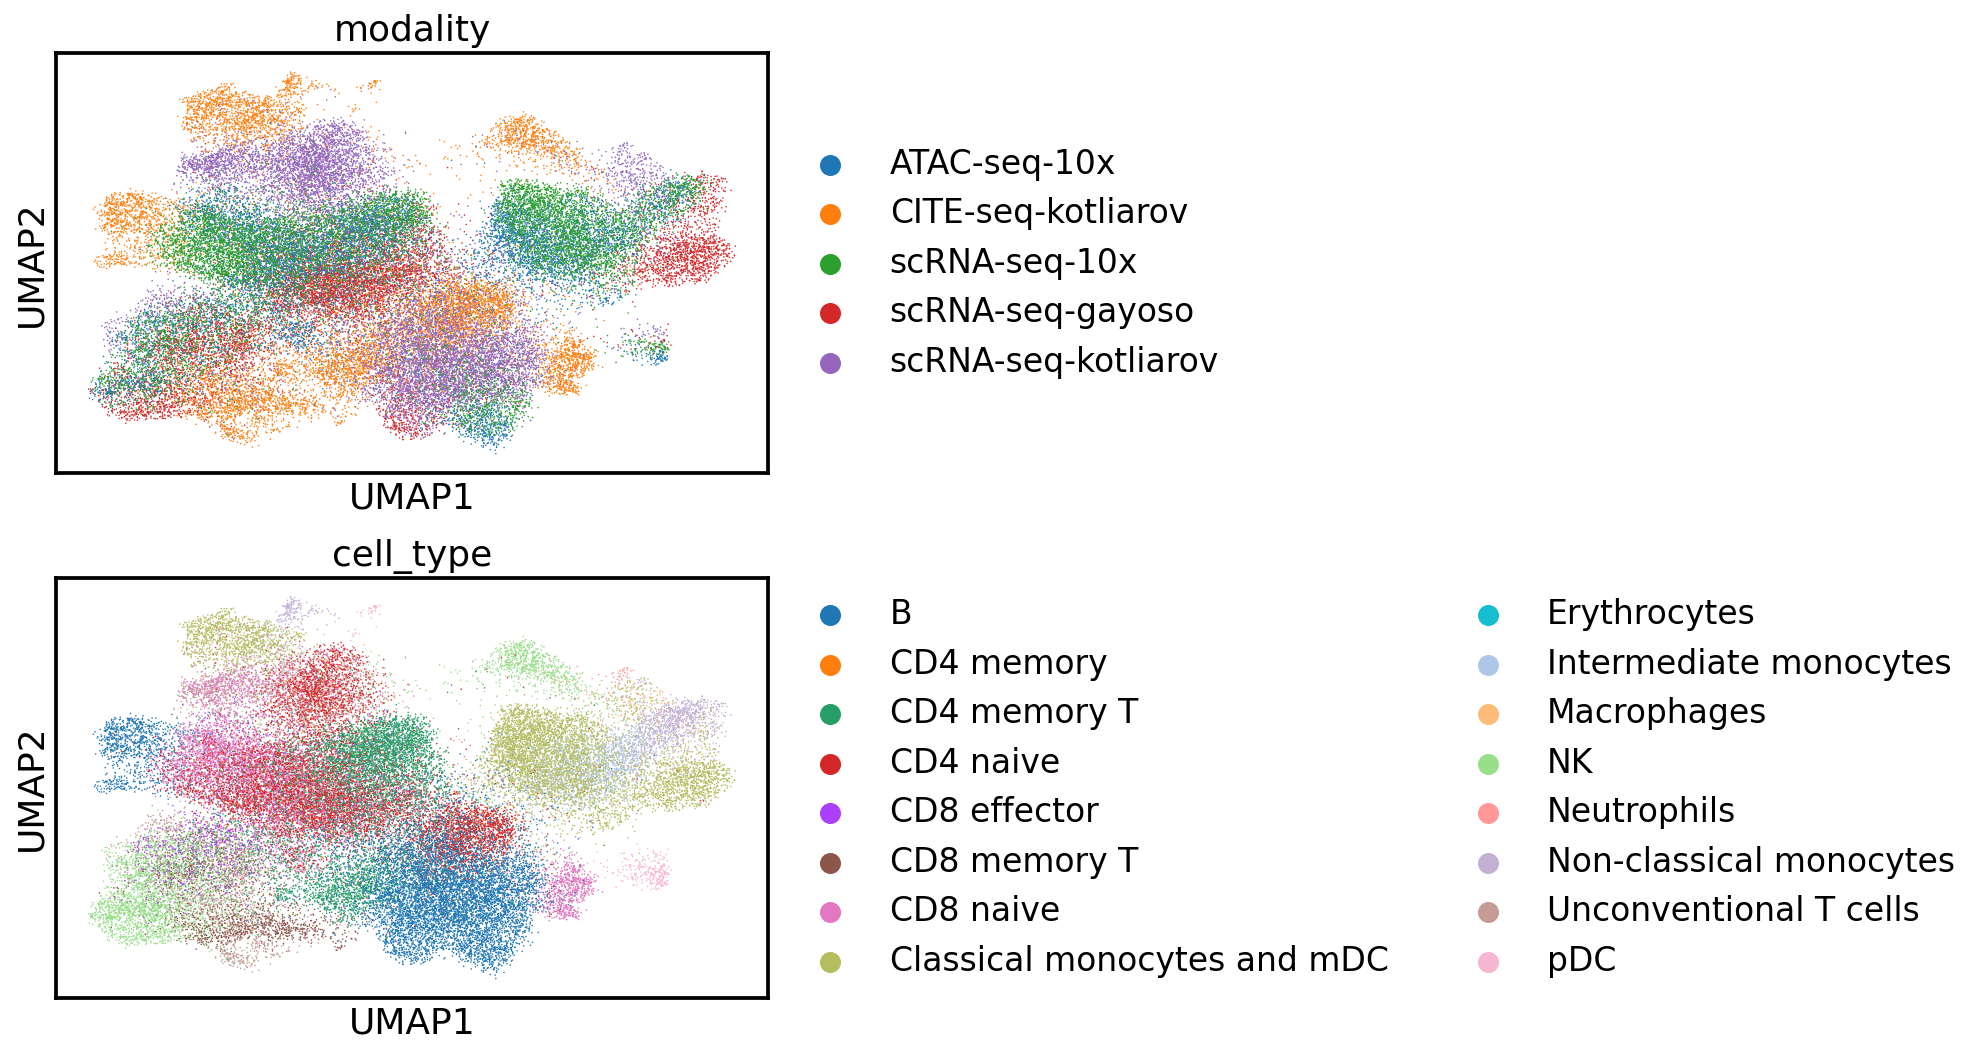

In [92]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

## Surgery

In [46]:
new_model = scmulti.operate(model, 
                   adatas=[[rna_granja], [], []],
                    names=[['scRNA-granja-query'], [], []],
                    pair_groups=[[0], [], []])

In [47]:
new_model.train(
    n_iters=50,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=25
)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |████████████████████| 100.0% iter=50/50, time=41.00(s), loss=0.5326, recon=0.5321, kl=6.1053, integ=-1.0000, val_loss=0.4113, val_recon=0.4106, val_kl=6.5955, val_integ=-1.0000


## Plot training history

In [ ]:
new_model.history

In [ ]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(new_model.history['iteration'], new_model.history['train_loss'], '.-', label='Train loss');
plt.plot(new_model.history['iteration'], new_model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(new_model.history['iteration'], new_model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(new_model.history['iteration'], new_model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(new_model.history['iteration'], new_model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(new_model.history['iteration'], new_model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(new_model.history['iteration'], new_model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(new_model.history['iteration'], new_model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [ ]:
z = new_model.predict(
    adatas=[[rna_granja], [], []],
    names=[['scRNA-granja-query'], [], []],
    batch_size=64,
)
z

In [ ]:
sc.tl.pca(z, svd_solver='arpack')

In [ ]:
sc.pl.pca(z, color=['modality', 'cell_type'], ncols = 1)

In [ ]:
sc.pl.pca_variance_ratio(z, log=True)

In [ ]:
sc.pp.neighbors(z, n_neighbors=10, n_pcs=9)

In [ ]:
sc.tl.umap(z)

In [ ]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

## Q to R

In [ ]:
z = new_model.predict(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso, rna_granja], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso', 'scRNA-granja-query'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    batch_size=64,
)
z

In [ ]:
sc.tl.pca(z, svd_solver='arpack')

In [ ]:
sc.pl.pca(z, color=['modality', 'cell_type'], ncols = 1)

In [ ]:
sc.pl.pca_variance_ratio(z, log=True)

In [ ]:
sc.pp.neighbors(z, n_neighbors=10, n_pcs=9)

In [ ]:
sc.tl.umap(z)

In [ ]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)